In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [18]:
import seaborn as sns

In [36]:
import re

In [39]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
soup = BeautifulSoup(r.text, 'html.parser')
indiatable = soup.find('table', {'class': "wikitable"})
df = pd.read_html(str(indiatable))
df = pd.DataFrame(df[0])

Distribution by sector

In [4]:
df.groupby("GICS Sector").count()["Symbol"]

GICS Sector
Communication Services    22
Consumer Discretionary    53
Consumer Staples          38
Energy                    23
Financials                71
Health Care               64
Industrials               78
Information Technology    65
Materials                 28
Real Estate               31
Utilities                 30
Name: Symbol, dtype: int64

In [58]:
selected_sectors = ["Energy", "Financials", "Industrials", "Information Technology"]

In [62]:
t = df["GICS Sector"] == selected_sectors[0]
for s in selected_sectors[1:]:
    t = t | (df["GICS Sector"] == s)

In [65]:
df = df[t]

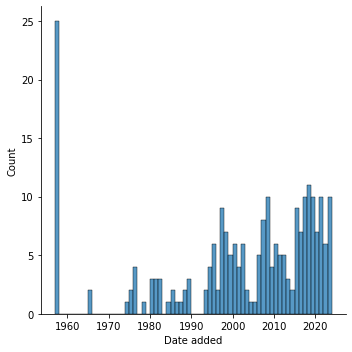

In [66]:
sns.displot(pd.DatetimeIndex(df['Date added']).year, binwidth=1)

In [41]:
df["year added"] = pd.DatetimeIndex(df['Date added']).year

In [67]:
df["Founded"] = df["Founded"].apply(lambda x: re.split(' |/', x)[0]).astype(int)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13396\1314043466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Founded"] = df["Founded"].apply(lambda x: re.split(' |/', x)[0]).astype(int)


In [69]:
df = df[df["Founded"] <= 2010]

In [70]:
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,year added
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,1957
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,2017
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,2011
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982,1997
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969,2017
...,...,...,...,...,...,...,...,...,...
487,WFC,Wells Fargo,Financials,Diversified Banks,"San Francisco, California",1976-06-30,72971,1852,1976
490,WDC,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",2009-07-01,106040,1970,2009
493,WMB,Williams Companies,Energy,Oil & Gas Storage & Transportation,"Tulsa, Oklahoma",1975-03-31,107263,1908,1975
495,GWW,W. W. Grainger,Industrials,Industrial Machinery & Supplies & Components,"Lake Forest, Illinois",1981-06-30,277135,1927,1981
